In [27]:
import numpy as np
import scipy.stats as sps
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


$I(\theta)=\mathbb{E}_{\theta}(\frac{\partial}{\partial\theta}\ln f_{\theta}(x_1,...,x_n))^2$

Неравенство Рао-Крамера:

$D_{\theta}\hat{\theta}(X) \geq \frac{1}{I_X(\theta)}$

Информация Фишера для бернуллиевского распределения: 

$I(\theta)=\frac{n}{\theta(1-\theta)}$

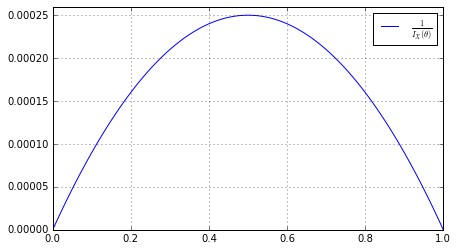

In [28]:
figure(figsize=(7, 4))
x = np.arange(0, 1.01, 0.01)
plot(x, map(lambda x: x*(1-x)/1000, x), label='$\\frac{1}{I_X(\\theta)}$')
plt.ylim(0, 0.00026)
plt.grid()
plt.legend()
plt.show()

Видим, что чуже всего оценивается параметр близкий к $\frac{1}{2}$.

Найдем эффективные оценки для выборок. Эффективная оценка для бернуллиевского распределение - выборочное среднее.

In [29]:
samples = np.array([sps.bernoulli.rvs(t, size = 1000) for t in np.arange(0, 1+0.01, 0.01)])

In [30]:
evs = samples.mean(axis=1)

Найдем бутстрепную оценку диспресии.

In [31]:
but = np.array([])
for t in evs:    
    evss_but = np.array([sps.bernoulli.rvs(t, size=1000) for i in range(500)]).mean(axis=1)
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    but = np.append(but, s2)  

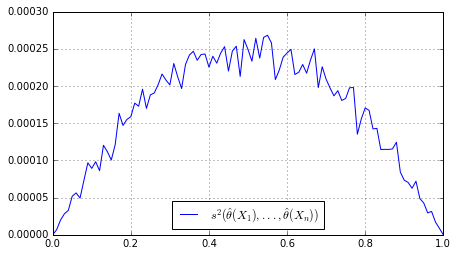

In [32]:
figure(figsize=(7, 4))
plot(np.arange(0, 1.01, 0.01), but, label='$s^2(\\hat{\\theta}(X_1),...,\\hat{\\theta}(X_n))$')
plt.grid()
plt.legend(loc=8)
plt.show()

Зависимость бутстрепной оценки дисперсии от параметра имеет тот же характер, что и зависимость оценки диспресии из неравенства Рао-Крамера от параметра.